In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:


class Continuous_gridWorld:
    def __init__(self, blocked_center):
        self.yaxis = 100
        self.xaxis = 100
        self.blocked_center = blocked_center
        self.initial_state = [(3, 3), (3, 4), (3, 5), (4, 3), (4, 4), (4, 5), (5, 3), (5, 4), (5, 5)]
        self.state = self.initial_state

    def create_blocked(self):
        self.blocked_list = []
        for i in self.blocked_center:
            for j in range(i[0]-5, i[0] + 5):
                for k in range(i[1] - 5, i[1] + 5):
                    if k < self.xaxis or j < self.yaxis or k >= 0 or j >= 0:
                        if k not in self.blocked_list:
                            self.blocked_list.append([j, k])
        return self.blocked_list

    def show_world(self):
        grid = np.zeros([self.xaxis, self.yaxis])
        for i in self.create_blocked():
          grid[i[0]][i[1]] = 1

        for i in self.terminal_state_create():
          grid[i[0]][i[1]] = 2
        return grid

    def agentPosition(self, grid):
        for i in self.state:
            grid[i[0]][i[1]] = 3
        return grid

    def cost_movement(self, state):
        cost = 0 
        for i in state:
            if i in self.blocked_list:
                cost += 1000
            elif i in self.terminal_state:
                cost -= 1000
            else:
                cost += 1
        return cost

    def transition_function(self, action, lastState):
        nxtState = []
        for s in lastState:
            
                if action == 'L':
                    if (s[0] - 10 <= 0):
                         self.state = lastState
                         reward = self.cost_movement(self.state) + 10
                         return reward
                    else:
                        nxtState.append([s[0] - 10, s[1]])
                elif action == 'R':
                    if (s[0] + 10 >= self.xaxis - 1):
                        self.state = lastState
                        reward = self.cost_movement(self.state) + 10
                        return reward
                    else:
                        nxtState.append([s[0] + 10, s[1]])
                elif action == 'U':
                    if (s[1] - 10 <= 0):
                        self.state = lastState
                        reward = self.cost_movement(self.state) + 10
                        return reward
                    else:
                        nxtState.append([s[0], s[1] - 10])
                else:
                    if (s[1] + 10 >= self.yaxis - 1):
                        reward = self.cost_movement(self.state) + 10
                        return reward
                    else:
                        nxtState.append([s[0], s[1] + 10])

        self.state = nxtState
        reward = self.cost_movement(self.state)
        return reward


    def terminal_state_create(self):
        self.terminal_state = []
        for i in range(79,100):
            for j in range(79, 100):
                self.terminal_state.append([i, j])
        return self.terminal_state

    def episode_break(self, state):
        for i in state:
            if i in self.terminal_state:
                    return True
            elif i in self.blocked_list:
                    return True
        return False

class Agent:
    def __init__(self):
        self.actions = ['L', 'R', 'U', 'D']
        

        self.qtable = []
        for q in range(0, 10):
            self.qtable.append([])
            for p in range(0, 10):
                self.qtable[q].append([])
                for a in range(4):
                    self.qtable[q][p].append(0)

    def action_selection(self, epsilon, state):
        if random.uniform(0, 1) <= epsilon:
            action = random.choice(self.actions)
        else:
            action_index = np.argmin(self.qtable[state[0]//10][state[1]//10])
            action = self.actions[action_index]
        return action

    def q_value_update(self, currentState, nxtState, action, cost, alpha, gamma):
        action_index = self.actions.index(action)
        min_nxtState = np.min(self.qtable[nxtState[0]//10][nxtState[1]//10])
        self.qtable[currentState[0]//10][currentState[1]//10][action_index] += alpha * (
            cost + gamma * min_nxtState - self.qtable[currentState[0]//10][currentState[1]//10][action_index])
    
        return self.qtable[currentState[0]//10][currentState[1]//10]

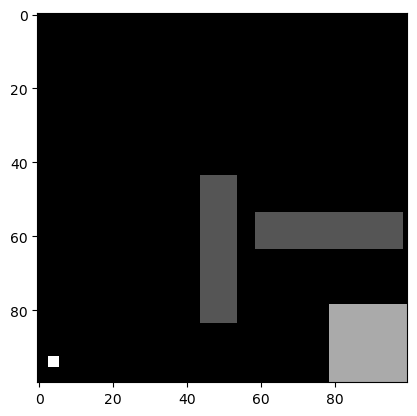

In [3]:
world = Continuous_gridWorld([(49, 49), (59, 49), (69, 49), (79, 49), (59, 64), (59, 74), (59, 84), (59, 94)])
Agentx = Agent()

world.state = [(93, 3), (93, 4), (93, 5), (94, 3), (94, 4), (94, 5), (95, 3), (95, 4), (95, 5)]
grid = world.show_world()
grid = world.agentPosition(grid)
plt.imshow(grid, cmap = 'gray')


In [4]:
def play(world, Agent, alpha=0.9, gamma=1, episode=1000, epsilon = 0.9):
    steps_per_episode = []
    cost_per_episode = []                      #used for storing the total cost of each episode for plotting
    epsilon_per_episode = []
    grid_per_episode = []
    action_per_episode = []
    qvalue_per_episode = []
    state_per_episode = []
    world.terminal_state_create()
    world.create_blocked()
    
    for z in range(episode):

        cumulative_cost = 0
        steps = 0
        grid_per_step = []
        action_per_step = []
        qvalue_per_step = []
        cost_per_step = []
        state_per_step = []
        while world.episode_break(world.state) != True:

            lastState = world.state

            state_per_step.append(lastState[4])

            action = Agent.action_selection(epsilon, lastState[4])
            
            per_cost = world.transition_function(action, lastState)

            currentState = world.state

            x = Agent.q_value_update(lastState[4], currentState[4], action, per_cost, alpha, gamma)

            qvalue_per_step.append(x)

            if z > 998 and z< 1000:
              # print(lastState[4],"   ", action, "   ", currentState, "    ", x)  
              grid = world.show_world()
              grid = world.agentPosition(grid)
              plt.imshow(grid, cmap = 'gray')
              plt.pause(0.0001)

            lastState = world.state
            
            cumulative_cost += per_cost
            steps += 1

            
            qvalue_per_step.append(x)
            cost_per_step.append(per_cost)
          
        
        if world.episode_break(world.state) == True:
            world.state = world.initial_state 
          
       
        if z % 100 == 0:
            epsilon *= 0.45
        
        

        steps_per_episode.append(steps)
        cost_per_episode.append(cumulative_cost)
        epsilon_per_episode.append(epsilon)
        action_per_episode.append(action_per_step)
        qvalue_per_episode.append(qvalue_per_step)
        state_per_episode.append(state_per_step)

    return cost_per_episode, state_per_episode, epsilon_per_episode, action_per_episode, qvalue_per_episode, state_per_episode

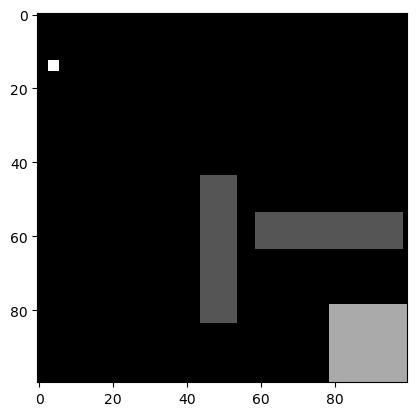

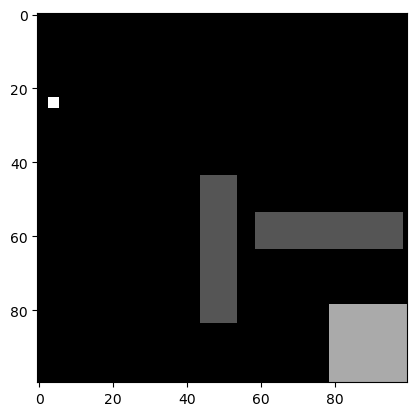

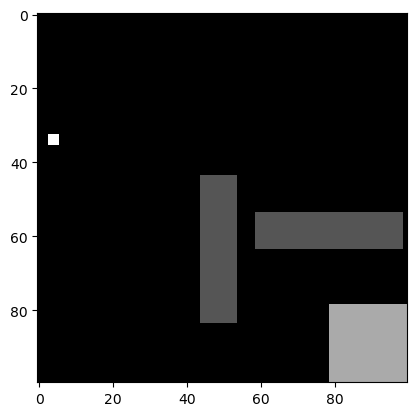

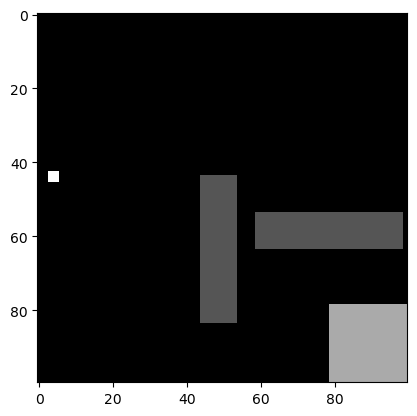

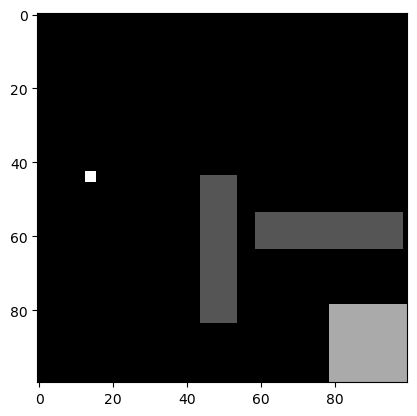

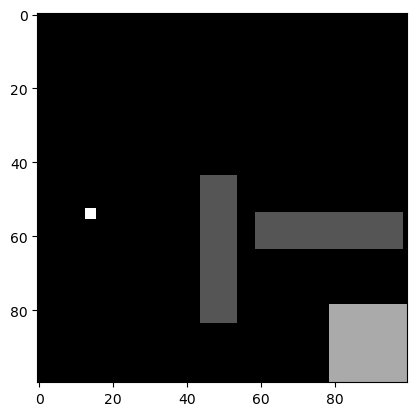

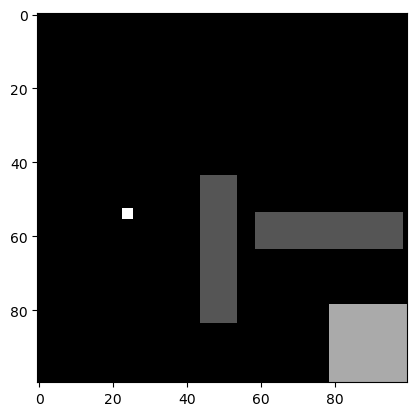

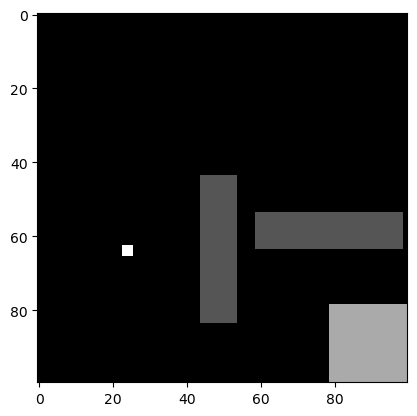

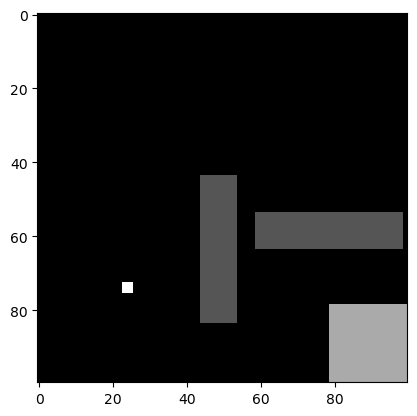

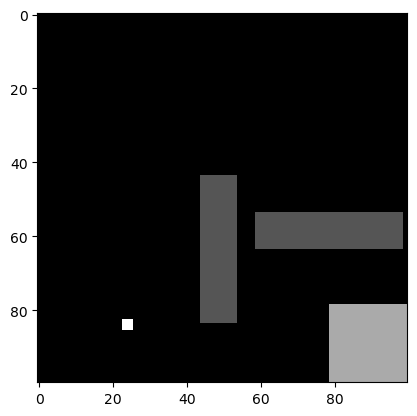

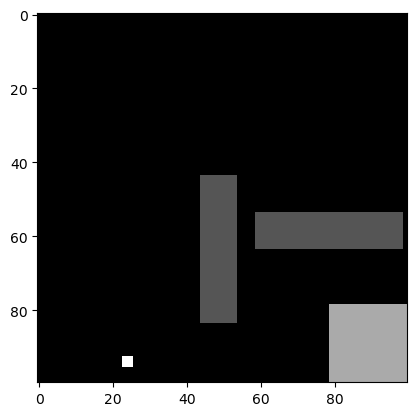

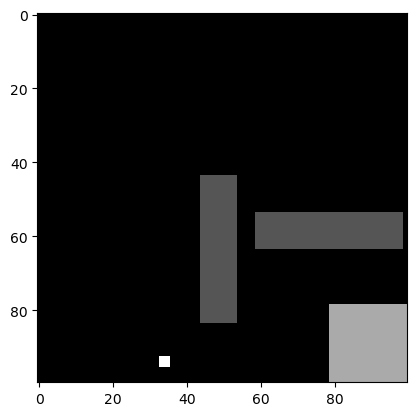

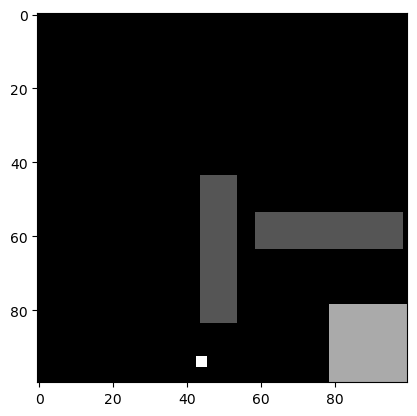

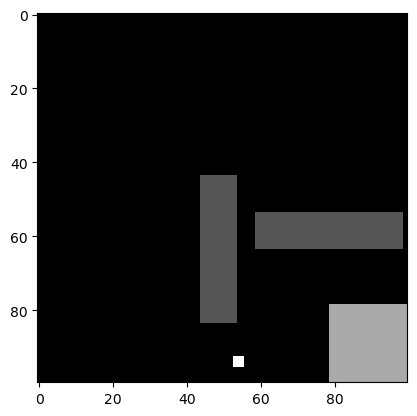

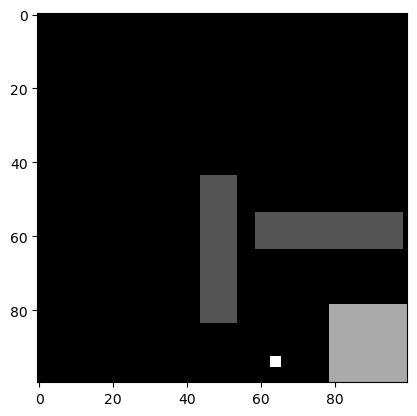

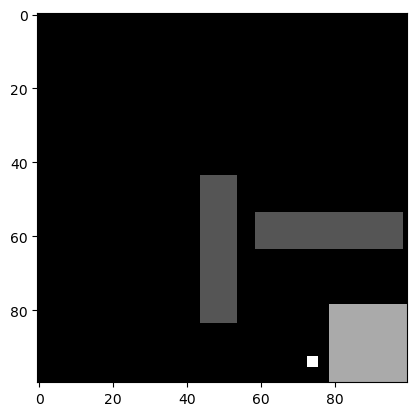

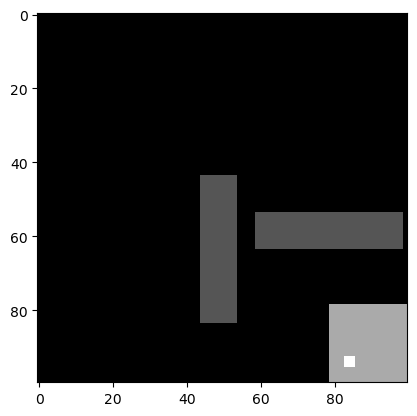

In [5]:
world = Continuous_gridWorld([(49, 49), (59, 49), (69, 49), (79, 49), (59, 64), (59, 74), (59, 84), (59, 94)])
Agentx = Agent()


cost_per_episode, steps_per_episode, epsilon_per_episode, action_index_per_episode, qvalue_per_episode, state_per_episode = play(world, Agentx)




# using matplotlib for plotting episode in x-axis and cost in y-axis
# fig1 = plt.figure("Figure1")
# plt.plot(cost_per_episode)
# plt.ylim(0, 150)
# plt.title("Cost per Episode")
# fig2 = plt.figure("Figure2")
# plt.plot(steps_per_episode)
# plt.ylim(0, 150)
# plt.title("Steps per Episode")
# fig3 = plt.figure("Figure3")
# plt.plot(epsilon_per_episode)
# plt.title("Epsilon per Episode")